In [ ]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
tf.compat.v1.disable_eager_execution()

In [ ]:
tf.reset_default_graph()
t_input = tf.keras.Input(dtype=tf.float32, shape=[1,1,])
flat1 = tf.keras.layers.BatchNormalization()(t_input)
flat2 = tf.keras.layers.Dense(8, activation='tanh', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.5), kernel_regularizer= tf.keras.regularizers.l1(l1 = .1))(flat1)
flat2 = tf.keras.layers.BatchNormalization()(flat2)
flat3 = tf.keras.layers.Dense(16, activation='tanh', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.5), kernel_regularizer= tf.keras.regularizers.l1(l1 = .1))(flat2)
flat3 = tf.keras.layers.BatchNormalization()(flat3)
flat4 = tf.keras.layers.Dense(16, activation='tanh', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.5), kernel_regularizer= tf.keras.regularizers.l1(l1 = .1))(flat3)
flat4 = tf.keras.layers.BatchNormalization()(flat4)
flat5 = tf.keras.layers.Dense(8, activation='tanh', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.5), kernel_regularizer= tf.keras.regularizers.l1(l1 = .1))(flat4)
flat5 = tf.keras.layers.BatchNormalization()(flat5)
x_out = tf.keras.layers.Dense(1, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(l1 = .1))(flat5) 


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
x_t = tf.gradients(x_out, t_input)
Cost = tf.reduce_mean((x_t - tf.math.cos(t_input))**2) 
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(Cost)
Cost_bc = tf.reduce_mean((x_out - 0)**2)
train_bc = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(Cost_bc)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# model = tf.keras.Model(inputs=t_input, outputs= x_out)

0.8383516
0.20888814
0.005684607
0.0001969001
0.00046318286
0.003193451
0.005955264
0.0008069388
0.00056596595
0.001039769
0.00026502772
0.0009794104


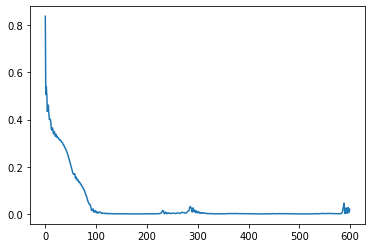

In [ ]:
costs = []
iters = 600
train_t = np.array([0.01*i for i in range(1000)]).reshape(1000,1,1)
for i in range(iters):
  feed = {t_input : train_t}
  _, cst1 = sess.run([train, Cost], feed_dict = feed)
  _, cst2 = sess.run([train_bc, Cost_bc], feed_dict= {t_input : np.array(0).reshape(1,1,1)})
  this_iter_cost = cst1 + cst2
  costs.append(this_iter_cost.reshape(1))
  if i%50==0:
    print(this_iter_cost)
plt.plot(costs) 



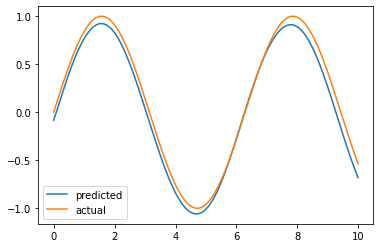

In [ ]:
steps = 1000
plt.plot([0.01*n for n in range(steps)], np.array(sess.run(x_out, feed_dict={t_input : np.array([0.01*n for n in range(steps)]).reshape(1000,1,1)})).reshape(1000) )
plt.plot([0.01*n for n in range(steps)], [np.math.sin(0.01*n) for n in range(steps)])
#plt.plot([0.01*n for n in range(steps)], np.array(sess.run(x_t, feed_dict={t_input : np.array([0.01*n for n in range(steps)]).reshape(1000,1,1)})).reshape(1000) )
plt.legend(['predicted', 'actual', 'x_t'])